In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
version = 'v1'

# label load

In [3]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# Residual autoencoder

In [7]:
encoding_dim = 16

### input ###
input_label = keras.Input(shape=(one_hot_train_labels.shape[1],))

### encoder 1 residual ###
encoded_1 = layers.Dense(256, activation='relu')(input_label)
encoded_2 = layers.Dense(128, activation='relu')(encoded_1)

residual_1 = layers.Dense(128)(input_label)
encoded_3 = layers.add([encoded_2, residual_1])
dropout_1 = layers.Dropout(0.2)(encoded_3)

### encoder 2 residual ###
encoded_4 = layers.Dense(64, activation='relu')(dropout_1)
encoded_5 = layers.Dense(32, activation='relu')(encoded_4)

residual_2 = layers.Dense(32)(dropout_1)
encoded_6 = layers.add([encoded_5, residual_2])


### latent space ###
latent_space = layers.Dense(encoding_dim, activation='relu')(encoded_6)


### decoder 1 residual ###
decoded_1 = layers.Dense(32, activation='relu')(latent_space)
decoded_2 = layers.Dense(64, activation='relu')(decoded_1)

residual_3 = layers.Dense(64)(latent_space)
decoded_3 = layers.add([decoded_2, residual_3])

### decoder 2 residual ###
decoded_4 = layers.Dense(128, activation='relu')(decoded_3)
decoded_5 = layers.Dense(256, activation='relu')(decoded_4)

residual_4 = layers.Dense(256)(decoded_3)
decoded_5 = layers.add([decoded_5, residual_4])

### output ###
decoded_6 = layers.Dense(one_hot_train_labels.shape[1], activation='sigmoid')(decoded_5)



autoencoder = keras.Model(input_label, decoded_6)

autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

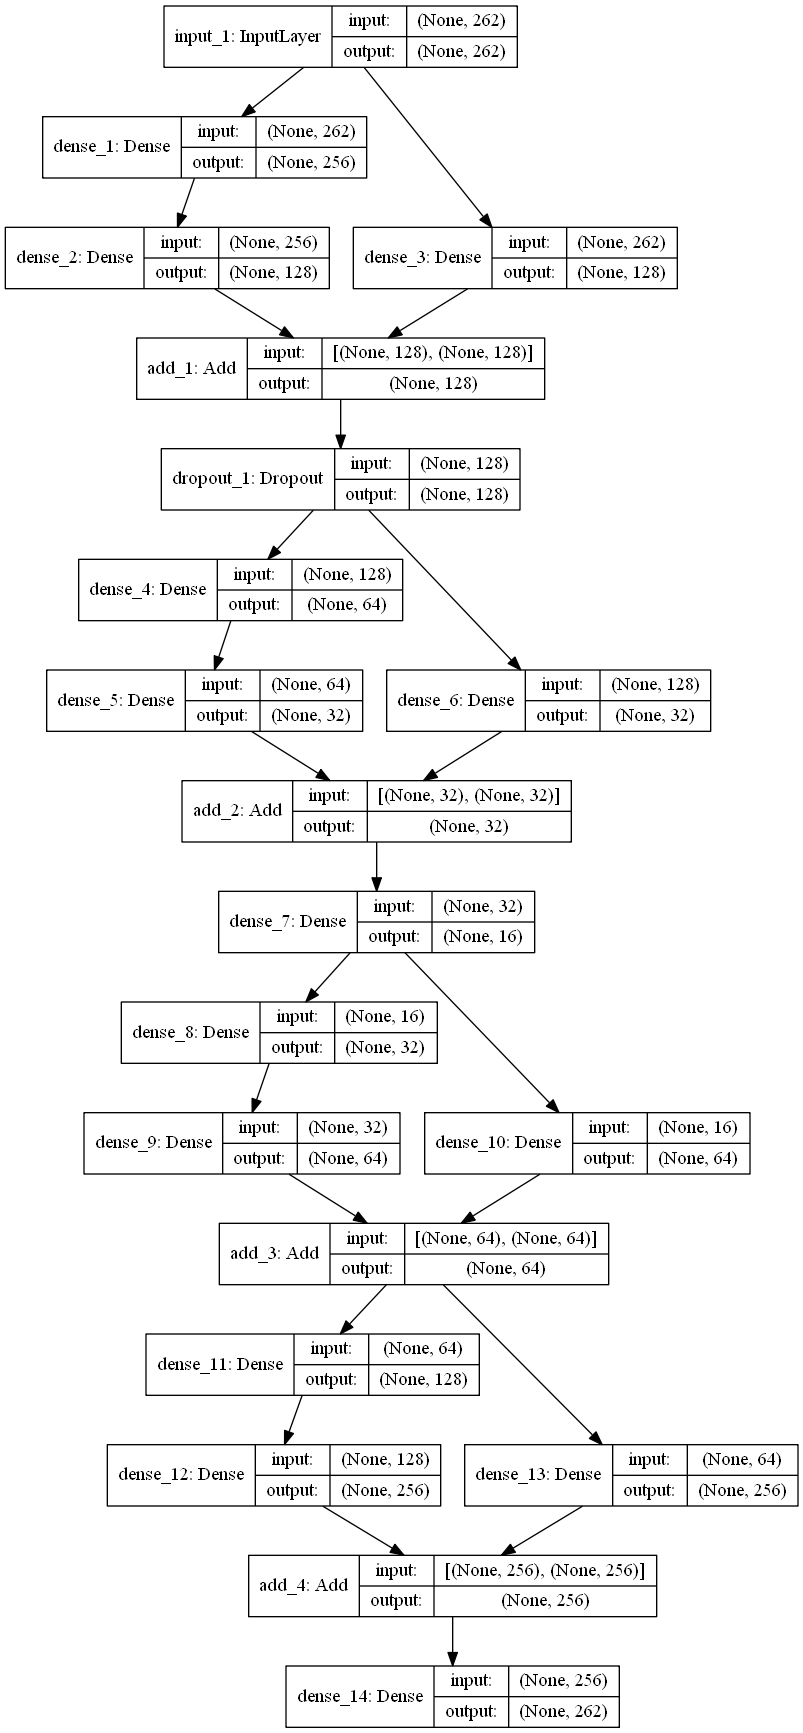

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Residual_AE_ls16_{}.png'.format(version))

In [9]:
encoder = keras.Model(input_label, latent_space)

encoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

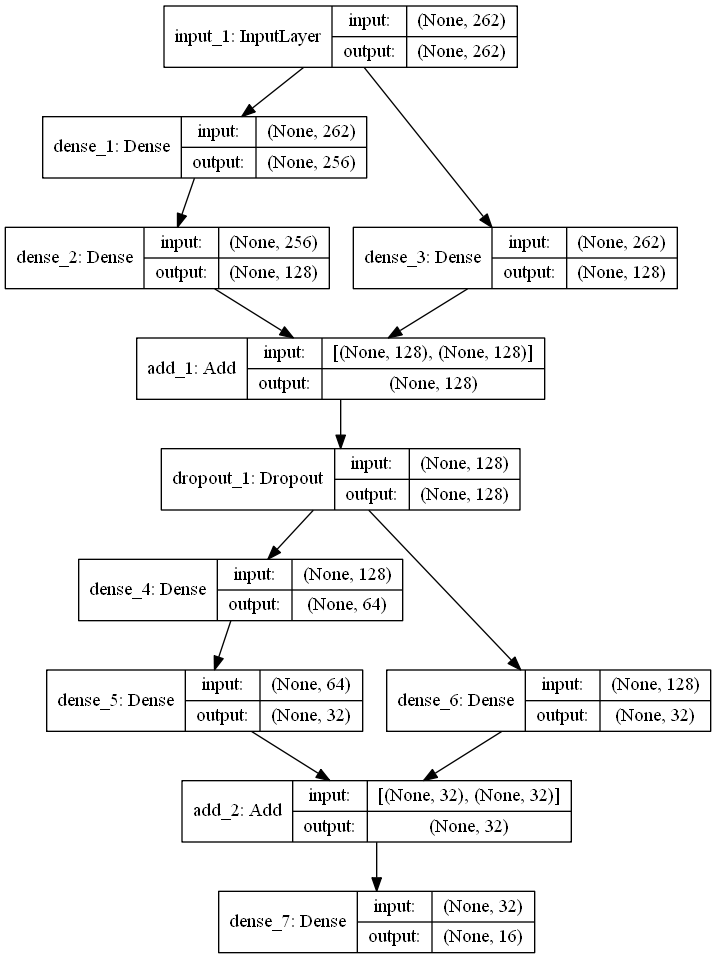

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(encoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(encoder, show_shapes=True, to_file='./img/Residual_Encoder_ls16_{}.png'.format(version))

In [11]:
### input ###
decoded_input = keras.Input(shape=(encoding_dim,))

### decoder 1 residual ###
decoder_layer4 = autoencoder.layers[-9](decoded_input)
decoder_layer5 = autoencoder.layers[-8](decoder_layer4)
decoder_residual2 = autoencoder.layers[-7](decoded_input)
decoder_layer6 = autoencoder.layers[-6]([decoder_layer5, decoder_residual2])

### decoder 2 residual ###
decoder_layer7 = autoencoder.layers[-5](decoder_layer6)
decoder_layer8 = autoencoder.layers[-4](decoder_layer7)
decoder_residual3 = autoencoder.layers[-3](decoder_layer6)
decoder_layer9 = autoencoder.layers[-2]([decoder_layer8, decoder_residual3])

### output ###
decoder_layer10 = autoencoder.layers[-1](decoder_layer9)


decoder = keras.Model(decoded_input, decoder_layer10)

decoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 16)           0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 32)           544         input_2[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 64)           2112        dense_8[1][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 64)           1088        input_2[0][0]                    
____________________________________________________________________________________________

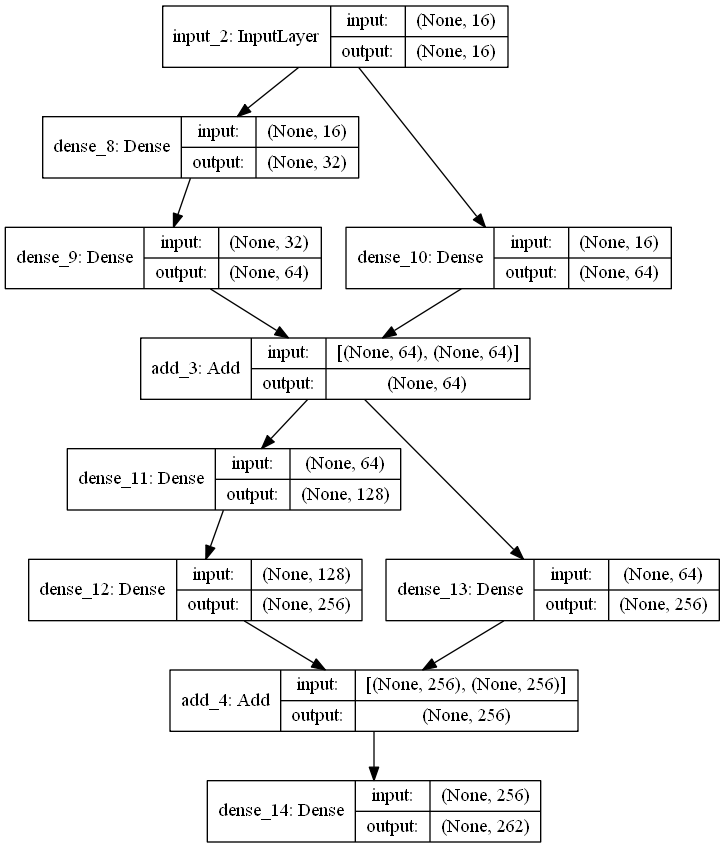

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(decoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(decoder, show_shapes=True, to_file='./img/Residual_Decoder_ls16_{}.png'.format(version))

In [13]:
optimizer = keras.optimizers.Adam(lr=0.001)

autoencoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
encoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
decoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)

### 버전 체크

In [14]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

filename = './trained_model/RAE_ls16_{}'.format(version) + '-{epoch:02d}-{val_loss:.5f}.h5'
mc = callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='auto')

In [15]:
history = autoencoder.fit(one_hot_train_labels,
                          one_hot_train_labels,
                          epochs=300,
                          batch_size=64,
                          validation_data=(one_hot_val_labels, one_hot_val_labels),
                          callbacks=[es, mc])

Train on 2805 samples, validate on 935 samples
Epoch 1/300
2805/2805 [==============================] - 1s 298us/step - loss: 0.1942 - val_loss: 0.0411

Epoch 00001: saving model to ./trained_model/RAE_ls16_v1-01-0.04108.h5
Epoch 2/300
2805/2805 [==============================] - 0s 88us/step - loss: 0.0368 - val_loss: 0.0353

Epoch 00002: saving model to ./trained_model/RAE_ls16_v1-02-0.03525.h5
Epoch 3/300
2805/2805 [==============================] - 0s 92us/step - loss: 0.0331 - val_loss: 0.0319

Epoch 00003: saving model to ./trained_model/RAE_ls16_v1-03-0.03190.h5
Epoch 4/300
2805/2805 [==============================] - 0s 90us/step - loss: 0.0300 - val_loss: 0.0292

Epoch 00004: saving model to ./trained_model/RAE_ls16_v1-04-0.02921.h5
Epoch 5/300
2805/2805 [==============================] - 0s 91us/step - loss: 0.0271 - val_loss: 0.0262

Epoch 00005: saving model to ./trained_model/RAE_ls16_v1-05-0.02623.h5
Epoch 6/300
2805/2805 [==============================] - 0s 88us/step - 

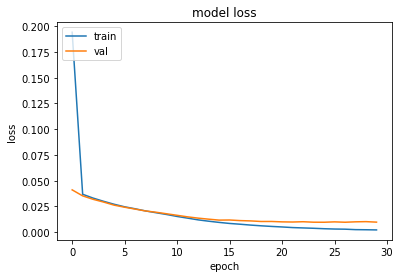

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
encoder.save('./trained_model/residual_encoder_ls16_{}.h5'.format(version))
decoder.save('./trained_model/residual_decoder_ls16_{}.h5'.format(version))

# inference

In [18]:
#one_hot_train_labels[0].shape[0]

In [19]:
encoded_values = encoder.predict(one_hot_test_labels)
encoded_values

array([[3.1092575 , 0.02804472, 4.2389445 , ..., 2.4731076 , 2.571003  ,
        2.881237  ],
       [5.2829046 , 3.47455   , 1.9438918 , ..., 0.7453276 , 4.6583676 ,
        1.6710093 ],
       [2.5320785 , 1.0857649 , 0.        , ..., 1.2511905 , 5.2288375 ,
        1.1219704 ],
       ...,
       [2.5223908 , 0.9466243 , 1.9106295 , ..., 4.887637  , 0.9712704 ,
        4.1886806 ],
       [4.784645  , 1.6478528 , 2.9496713 , ..., 3.8695664 , 1.1334213 ,
        1.7698432 ],
       [1.0399195 , 3.0653944 , 3.1710703 , ..., 1.9109466 , 4.853198  ,
        0.        ]], dtype=float32)

In [20]:
b = pd.DataFrame(encoded_values)
b.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,3.293163,1.479415,2.126260,0.003486,4.053645,3.550504,2.854343,2.447282,2.645872,3.909250,3.942264,2.971038,3.157322,1.862791,3.369802,2.144354
std,1.699449,1.193621,1.445435,0.039194,1.987149,1.747334,1.673182,1.294319,1.621303,1.804526,1.378424,1.620061,1.681967,1.354396,1.877998,1.655900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.072580,0.550987,1.081129,0.000000,2.549310,2.221353,1.782788,1.510915,1.400903,2.721822,3.033451,1.730510,2.044490,0.788416,2.059435,0.694093
50%,3.430520,1.271329,2.025228,0.000000,4.354528,3.666541,2.869376,2.377259,2.621030,3.965179,4.059500,2.986835,3.152489,1.671339,3.301484,1.820917
75%,4.298594,2.222932,2.674960,0.000000,5.642745,4.921995,3.917050,3.276549,3.989880,4.896937,4.804951,4.271500,4.335863,3.006628,4.475902,3.523954
max,9.338970,6.937592,7.486815,0.581093,9.425041,9.242721,8.927721,6.656148,8.665486,10.773273,7.871829,8.619628,8.749496,6.482798,10.136633,7.901217


In [21]:
#b.to_excel('./Residual_AE_v10.xlsx')

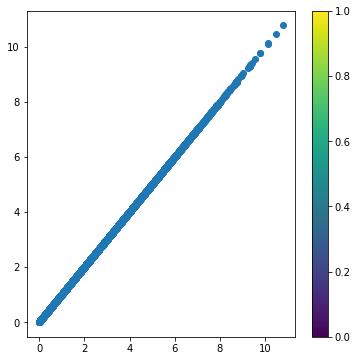

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_values[:, :], encoded_values[:, :])
plt.colorbar()
plt.show()

In [23]:
decoded_label = decoder.predict(encoded_values)
decoded_label

array([[2.2734230e-02, 3.8005193e-05, 9.9955732e-01, ..., 9.3016279e-09,
        3.8240355e-08, 2.1792012e-07],
       [1.4484409e-14, 3.6587451e-09, 2.7248780e-20, ..., 7.7499340e-10,
        5.5348184e-09, 5.0845596e-13],
       [6.4442052e-09, 1.4179810e-05, 2.3448588e-17, ..., 1.7788876e-16,
        1.9951505e-15, 1.3307035e-04],
       ...,
       [2.2857327e-08, 1.2548842e-05, 5.0702488e-07, ..., 1.9555903e-06,
        4.0733167e-14, 3.9263242e-09],
       [5.9131822e-10, 7.4030788e-11, 2.6232783e-10, ..., 9.4941512e-05,
        7.9682536e-09, 2.0304256e-09],
       [1.5118140e-09, 3.9823016e-09, 3.3037189e-16, ..., 2.7279205e-12,
        2.1478336e-11, 5.4421589e-06]], dtype=float32)

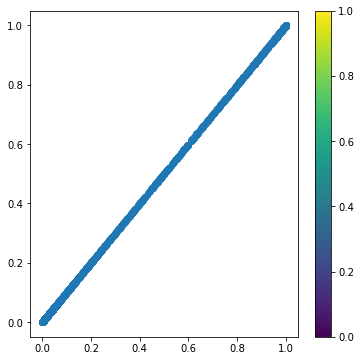

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(decoded_label[:, :], decoded_label[:, :])
plt.colorbar()
plt.show()

In [25]:
predicted_label = decoded_label.round()
predicted_label

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
"""predicted_label = np.where(decoded_label > 0.5, 1, 0)
predicted_label"""

'predicted_label = np.where(decoded_label > 0.5, 1, 0)\npredicted_label'

In [27]:
one_hot_test_labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [29]:
c_matrix.shape

(262, 2, 2)

In [30]:
c_matrix

array([[[932,   1],
        [  0,   2]],

       [[928,   0],
        [  1,   6]],

       [[874,   0],
        [  8,  53]],

       ...,

       [[932,   0],
        [  2,   1]],

       [[934,   0],
        [  0,   1]],

       [[934,   0],
        [  1,   0]]], dtype=int64)

In [31]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='micro'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.7379679144385026
precision :  0.8704560475875743
recall :  0.7928958458759783
f1 :  0.8298676748582231
hamming_loss :  0.0022043515532514184


In [32]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='samples'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.7379679144385026
precision :  0.8955589508530686
recall :  0.8637967914438502
f1 :  0.8705216827141962
hamming_loss :  0.0022043515532514184


C:\Users\user\.conda\envs\mlc\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
"""labels = ["".join("c" + str(i)) for i in range(1, 21)]
labels"""

'labels = ["".join("c" + str(i)) for i in range(1, 21)]\nlabels'

In [34]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):\n\n    df_cm = pd.DataFrame(\n        confusion_matrix, index=class_names, columns=class_names,\n    )\n\n    try:\n        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)\n    except ValueError:\n        raise ValueError("Confusion matrix values must be integers.")\n    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha=\'right\', fontsize=fontsize)\n    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha=\'right\', fontsize=fontsize)\n    axes.set_xlabel(\'True label\')\n    axes.set_ylabel(\'Predicted label\')\n    axes.set_title("Confusion Matrix for the class - " + class_label)'

In [35]:
"""fig, ax = plt.subplots(5, 4, figsize=(12, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])
    
fig.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(5, 4, figsize=(12, 12))\n    \nfor axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):\n    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])\n    \nfig.tight_layout()\nplt.show()'